<a href="https://colab.research.google.com/github/8ahmedanwer8/randomForestClassifierTinkering/blob/main/randomForestOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd 
from sklearn.datasets import load_digits
digits = load_digits()

<Figure size 432x288 with 0 Axes>

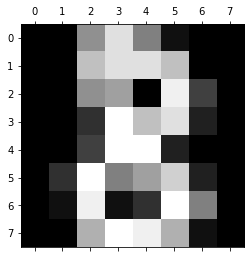

In [58]:
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[8])

In [31]:
print(digits.data.shape)
df = pd.DataFrame(digits.data)
df['target'] = digits.target
df.head()

(1797, 64)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(['target'],axis = 'columns'), digits.target, test_size = 0.2)


360

In [45]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=50)
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.9777777777777777

In [46]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1)
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.7888888888888889

In [49]:
y_predicted = model.predict(X_test)
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_test,y_predicted)
confusionMatrix

#make it prettier with seaborn library

array([[33,  0,  0,  0,  0,  0,  0,  0,  3,  0],
       [ 0, 28,  1,  0,  1,  1,  2,  1,  4,  2],
       [ 0,  2, 29,  0,  0,  0,  0,  1,  1,  0],
       [ 0,  1,  1, 29,  0,  2,  0,  1,  1,  4],
       [ 1,  0,  0,  0, 29,  0,  0,  1,  1,  0],
       [ 0,  1,  0,  1,  0, 28,  1,  2,  3,  2],
       [ 0,  0,  0,  0,  2,  3, 31,  0,  0,  0],
       [ 0,  0,  1,  0,  1,  0,  0, 33,  2,  0],
       [ 1,  0,  4,  2,  0,  1,  1,  0, 20,  4],
       [ 0,  1,  1,  4,  1,  3,  0,  2,  0, 24]])

Text(69.0, 0.5, 'Truth')

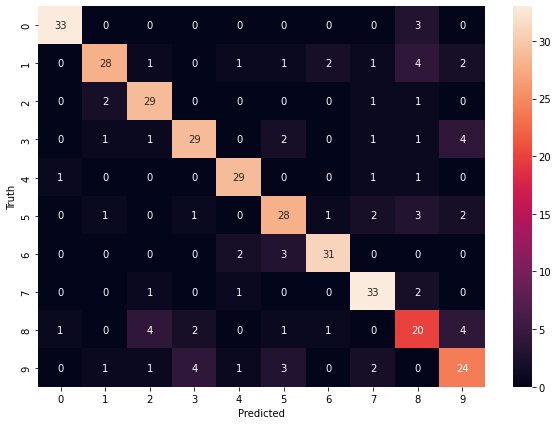

In [54]:
import seaborn as sn 
plt.figure(figsize = (10,7))
sn.heatmap(confusionMatrix, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')